# Visualizing data

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('./Google_Stock_Price_Train.csv')

In [106]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [116]:
df.dtypes

Date       object
Open      float64
High      float64
Low       float64
Close      object
Volume     object
dtype: object

In [124]:
training_set=df.iloc[:,1:3].values

In [125]:
training_set.shape

(1258, 2)

# Feature Scaling

In [126]:
from sklearn.preprocessing import MinMaxScaler

In [127]:
sc=MinMaxScaler()

In [128]:
training_set= sc.fit_transform(training_set)

In [129]:
training_set

array([[0.09640129, 0.09044931],
       [0.09834351, 0.09823458],
       [0.09251685, 0.09408623],
       ...,
       [0.95807422, 0.95844067],
       [0.94257381, 0.95033338],
       [0.93669113, 0.93421352]])

# Splitting into training and testing

In [130]:
X_train=training_set[0:1257]

In [131]:
X_train

array([[0.09640129, 0.09044931],
       [0.09834351, 0.09823458],
       [0.09251685, 0.09408623],
       ...,
       [0.96485331, 0.96688892],
       [0.95807422, 0.95844067],
       [0.94257381, 0.95033338]])

In [132]:
y_train=training_set[1:1258]

In [133]:
y_train

array([[0.09834351, 0.09823458],
       [0.09251685, 0.09408623],
       [0.08881917, 0.08800576],
       ...,
       [0.95807422, 0.95844067],
       [0.94257381, 0.95033338],
       [0.93669113, 0.93421352]])

# Reshaping

In [134]:
# reshaping into 3 dim in which last dim has a gap of dates.

In [136]:
X_train=X_train.reshape(1257,2,1)

In [137]:
X_train.shape

(1257, 2, 1)

In [138]:
X_train.shape[0]

1257

# Creating model

In [139]:
import keras

In [140]:
from keras.models import Sequential

In [141]:
model=Sequential()

In [142]:
model.add(keras.layers.LSTM(4,activation='relu',input_shape=(2,1),return_sequences=True))
model.add(keras.layers.LSTM(4))
model.add(keras.layers.Dense(2))

In [143]:
model.compile(optimizer='adam',loss='mean_squared_error')

In [144]:
model.fit(X_train,y_train,batch_size=32,epochs=200)

Epoch 1/200
1257/1257 [==============================] - 2s 2ms/step - loss: 0.2596
Epoch 2/200
1257/1257 [==============================] - 0s 156us/step - loss: 0.1850
Epoch 3/200
1257/1257 [==============================] - 0s 111us/step - loss: 0.1139
Epoch 4/200
1257/1257 [==============================] - 0s 115us/step - loss: 0.0628
Epoch 5/200
1257/1257 [==============================] - 0s 114us/step - loss: 0.0396
Epoch 6/200
1257/1257 [==============================] - 0s 116us/step - loss: 0.0241
Epoch 7/200
1257/1257 [==============================] - 0s 114us/step - loss: 0.0109
Epoch 8/200
1257/1257 [==============================] - 0s 116us/step - loss: 0.0031
Epoch 9/200
1257/1257 [==============================] - 0s 115us/step - loss: 6.8814e-04
Epoch 10/200
1257/1257 [==============================] - 0s 116us/step - loss: 3.6832e-04
Epoch 11/200
1257/1257 [==============================] - 0s 124us/step - loss: 3.3601e-04
Epoch 12/200
1257/1257 [==================

1257/1257 [==============================] - 0s 142us/step - loss: 2.3075e-04
Epoch 92/200
1257/1257 [==============================] - 0s 114us/step - loss: 2.2894e-04
Epoch 93/200
1257/1257 [==============================] - 0s 108us/step - loss: 2.2588e-04
Epoch 94/200
1257/1257 [==============================] - 0s 108us/step - loss: 2.2209e-04
Epoch 95/200
1257/1257 [==============================] - 0s 112us/step - loss: 2.2306e-04
Epoch 96/200
1257/1257 [==============================] - 0s 113us/step - loss: 2.2858e-04
Epoch 97/200
1257/1257 [==============================] - 0s 113us/step - loss: 2.2358e-04
Epoch 98/200
1257/1257 [==============================] - 0s 115us/step - loss: 2.2474e-04
Epoch 99/200
1257/1257 [==============================] - 0s 113us/step - loss: 2.2532e-04
Epoch 100/200
1257/1257 [==============================] - 0s 119us/step - loss: 2.2808e-04
Epoch 101/200
1257/1257 [==============================] - 0s 113us/step - loss: 2.2464e-04
Epoch 102/

1257/1257 [==============================] - 0s 134us/step - loss: 2.1878e-04
Epoch 181/200
1257/1257 [==============================] - 0s 137us/step - loss: 2.2081e-04
Epoch 182/200
1257/1257 [==============================] - 0s 128us/step - loss: 2.2324e-04
Epoch 183/200
1257/1257 [==============================] - 0s 128us/step - loss: 2.2864e-04
Epoch 184/200
1257/1257 [==============================] - 0s 131us/step - loss: 2.2572e-04
Epoch 185/200
1257/1257 [==============================] - 0s 127us/step - loss: 2.1856e-04
Epoch 186/200
1257/1257 [==============================] - 0s 132us/step - loss: 2.1685e-04
Epoch 187/200
1257/1257 [==============================] - 0s 132us/step - loss: 2.3346e-04
Epoch 188/200
1257/1257 [==============================] - 0s 128us/step - loss: 2.2881e-04
Epoch 189/200
1257/1257 [==============================] - 0s 143us/step - loss: 2.2912e-04
Epoch 190/200
1257/1257 [==============================] - 0s 137us/step - loss: 2.1768e-04
Ep

In [145]:
test_data=pd.read_csv('./Google_Stock_Price_Test.csv')

In [146]:
stock_test_data=test_data.iloc[:,1:3].values

In [147]:
stock_test_data

array([[778.81, 789.63],
       [788.36, 791.34],
       [786.08, 794.48],
       [795.26, 807.9 ],
       [806.4 , 809.97],
       [807.86, 809.13],
       [805.  , 808.15],
       [807.14, 807.39],
       [807.48, 811.22],
       [807.08, 807.14],
       [805.81, 806.21],
       [805.12, 809.48],
       [806.91, 806.91],
       [807.25, 820.87],
       [822.3 , 825.9 ],
       [829.62, 835.77],
       [837.81, 838.  ],
       [834.71, 841.95],
       [814.66, 815.84],
       [796.86, 801.25]])

In [148]:
inputs=sc.fit_transform(stock_test_data)

In [149]:
inputs

array([[0.        , 0.        ],
       [0.16186441, 0.03268349],
       [0.12322034, 0.09269878],
       [0.27881356, 0.34919725],
       [0.46762712, 0.38876147],
       [0.49237288, 0.37270642],
       [0.44389831, 0.35397554],
       [0.48016949, 0.33944954],
       [0.4859322 , 0.41265291],
       [0.47915254, 0.33467125],
       [0.45762712, 0.31689602],
       [0.4459322 , 0.37939602],
       [0.47627119, 0.33027523],
       [0.4820339 , 0.5970948 ],
       [0.73711864, 0.69323394],
       [0.86118644, 0.88188073],
       [1.        , 0.92450306],
       [0.94745763, 1.        ],
       [0.60762712, 0.50095566],
       [0.3059322 , 0.2220948 ]])

In [150]:
inputs.shape

(20, 2)

In [152]:
inputs=inputs.reshape(20,2,1)

In [153]:
predictions=model.predict(inputs)

In [154]:
predicted_stock_price=sc.inverse_transform(predictions)

In [155]:
predicted_stock_price

array([[779.2902 , 790.0175 ],
       [785.58246, 795.5291 ],
       [785.40393, 795.42535],
       [796.561  , 805.3289 ],
       [804.84735, 812.54614],
       [805.4786 , 813.07874],
       [803.1572 , 811.04956],
       [804.2724 , 812.0026 ],
       [806.08765, 813.64325],
       [804.128  , 811.87305],
       [802.89197, 810.78577],
       [803.7866 , 811.6181 ],
       [803.9184 , 811.6873 ],
       [809.81805, 817.04407],
       [821.84296, 827.59875],
       [830.1773 , 835.0494 ],
       [835.77637, 839.99524],
       [835.43726, 839.761  ],
       [812.7995 , 819.5504 ],
       [794.9264 , 803.80035]], dtype=float32)

In [156]:
import matplotlib.pyplot as plt

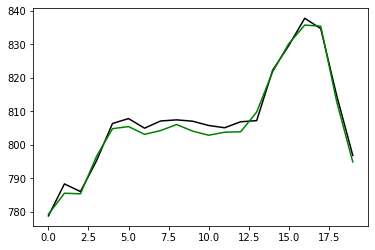

In [159]:
plt.plot(stock_test_data[:,0],color='black')
plt.plot(predicted_stock_price[:,0],color='green')
plt.show()

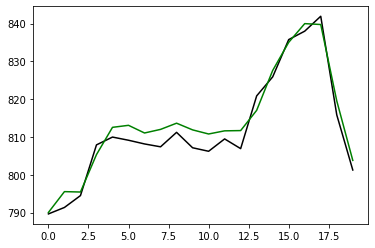

In [160]:
plt.plot(stock_test_data[:,1],color='black')
plt.plot(predicted_stock_price[:,1],color='green')
plt.show()